In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from functions import *

# Read data

In [7]:
folder_path = '/Users/muxin/PyCharm/mediapipe_hand_prediction/results/baseline/raw/'
nh_df = pd.read_csv(f'{folder_path}naked_hands.csv')
oh_df = pd.read_csv(f'{folder_path}hands_with_objects.csv')
dfs = [nh_df, oh_df]
lables = ['naked hands', 'hands with objects']

# Hand recognise analysis

In [8]:
for i in range(len(dfs)): 
    hand_recognise_confusion_matrix = form_confusion_matrix_for_hand_recognition_results(dfs[i], 'iou', [-1, 0.5], True)
    precision, recall, f1_score = compute_evaluation_metric(hand_recognise_confusion_matrix)
    print(f'result for {lables[i]}:')
    print(hand_recognise_confusion_matrix)
    print('precision: ' + str(precision))
    print('recall: ' + str(recall))
    print('f1_score: ' + str(f1_score)+'\n')

result for naked hands:
  label  counts
0    TP    2794
1    FN     137
2    FP      69
precision: 0.9758994062172547
recall: 0.9532582736267485
f1_score: 0.9644459785985502

result for hands with objects:
  label  counts
0    TP    2062
1    FN     345
2    FP      93
precision: 0.9568445475638051
recall: 0.8566680515164105
f1_score: 0.9039894782989917



/Users/muxin/PyCharm/mediapipe_hand_prediction/result_analysis/functions.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['hand_recognise_result'] = new_df.apply(
/Users/muxin/PyCharm/mediapipe_hand_prediction/result_analysis/functions.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['hand_recognise_result'] = new_df.apply(


# Hand landmark prediction analysis

In [9]:
print(f'result for {lables[0]}:')
print(nh_df[nh_df['iou']!=-1][["iou", 'mean_keypoint_error']].mean())
print(f'\nresult for {lables[1]}:')
print(oh_df[nh_df['iou']!=-1][["iou", 'mean_keypoint_error']].mean())

result for naked hands:
iou                    0.773839
mean_keypoint_error    7.539615
dtype: float64

result for hands with objects:
iou                    0.500010
mean_keypoint_error    8.638545
dtype: float64


/var/folders/6t/sxf2c12s3vn8t_cfydxk6q5m0000gn/T/ipykernel_2529/2352739573.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(oh_df[nh_df['iou']!=-1][["iou", 'mean_keypoint_error']].mean())


## To select a euclidean distances as error threshold 

In [10]:
pred_value = nh_df.drop(['iou', 'mean_keypoint_error', 'filename'], axis=1).iloc[:, 1:].stack()
y_true = 60000 * [1]
thresholds = np.arange(start=0, stop=101, step=1)
precisions, recalls = precision_recall_curve_from(y_true, pred_value, thresholds)

/Users/muxin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
f1s = 2 * ((np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls)))

/var/folders/6t/sxf2c12s3vn8t_cfydxk6q5m0000gn/T/ipykernel_85002/4043118568.py:1: RuntimeWarning: invalid value encountered in true_divide
  f1s = 2 * ((np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls)))


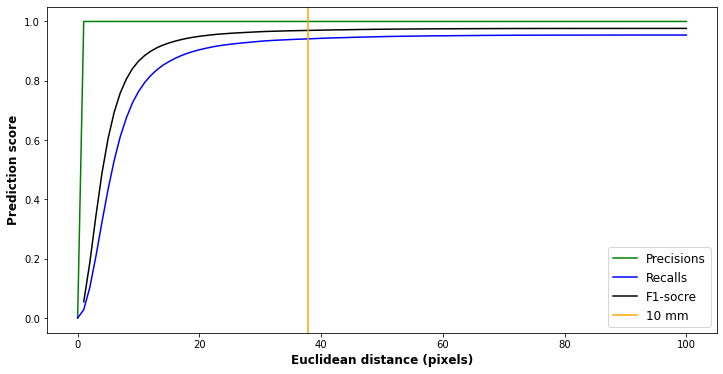

In [8]:
fig = plt.subplots(figsize=(12, 6))

plt.plot(precisions, color='green', label='Precisions')
plt.plot(recalls, color='blue', label='Recalls')
plt.plot(f1s, color='black', label='F1-socre')
plt.axvline(x = 37.795, color = 'orange', label = '10 mm')

plt.xlabel("Euclidean distance (pixels)", fontsize=12, fontweight='bold')
plt.ylabel("Prediction score", fontsize=12, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)

## Euclidean Distances 10 mm 

In [12]:
for i in range(len(dfs)): 
    confusion_matrix = form_confusion_matrix_for_hand_landmark_localisation_results(dfs[i], ['iou', 'mean_keypoint_error'], [-1, 37.795])
    confusion_matrix['label'] = confusion_matrix.index
    precision, recall, f1_score = compute_evaluation_metric(confusion_matrix)
    print(f'result for {lables[i]}:')
    print(confusion_matrix)
    print('precision: ' + str(precision))
    print('recall: ' + str(recall))
    print('f1_score: ' + str(f1_score)+'\n')

/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_pr

/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),


result for naked hands:
    counts label
TP   59336    TP
FN    2877    FN
FP     787    FP
precision: 0.9869101674899788
recall: 0.9537556459260926
f1_score: 0.9700496991891184



/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_pr

result for hands with objects:
    counts label
TP   44083    TP
FN    7245    FN
FP    1172    FP
precision: 0.9741023091371119
recall: 0.8588489713216958
f1_score: 0.9128521582473107



/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),


In [13]:
for i in range(len(dfs)):
    confusion_matrix = form_confusion_matrix_for_hand_landmark_localisation_results(dfs[i], ['iou', 'mean_keypoint_error'], [-1, 37.795], 'keypoints')
    result = tabulate_evaluation_metric_by_keypoint(confusion_matrix)
    print(f'result for {lables[i]}:')
    write_to_csv(result, f'{lables[i]}_results.csv')
    print(result)

/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_pr

result for naked hands:
    keypoint  precision    recall  f1_score
0          0   0.998254  0.954257  0.975760
1          1   0.994761  0.954104  0.974008
2          2   0.975201  0.953226  0.964088
3          3   0.971009  0.953034  0.961938
4          4   0.958784  0.952464  0.955614
5          5   0.996507  0.954181  0.974885
6          6   0.991617  0.953965  0.972427
7          7   0.988474  0.953825  0.970840
8          8   0.980091  0.953449  0.966586
9          9   1.000000  0.954333  0.976633
10        10   0.999651  0.954318  0.976459
11        11   0.996856  0.954196  0.975060
12        12   0.992316  0.953996  0.972779
13        13   0.999301  0.954303  0.976284
14        14   0.998603  0.954272  0.975934
15        15   0.993364  0.954042  0.973306
16        16   0.983234  0.953591  0.968186
17        17   0.989521  0.953872  0.971370
18        18   0.983234  0.953591  0.968186
19        19   0.973454  0.953146  0.963193
20        20   0.960880  0.952562  0.956703


/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_pr

result for hands with objects:
    keypoint  precision    recall  f1_score
0          0   0.982831  0.859927  0.917280
1          1   0.981439  0.859756  0.916576
2          2   0.955452  0.856489  0.903268
3          3   0.944316  0.855042  0.897464
4          4   0.930858  0.853254  0.890368
5          5   0.986079  0.860324  0.918919
6          6   0.980974  0.859699  0.916342
7          7   0.982367  0.859870  0.917046
8          8   0.971694  0.858549  0.911624
9          9   0.995824  0.861501  0.923805
10        10   0.993968  0.861279  0.922878
11        11   0.990255  0.860831  0.921019
12        12   0.980046  0.859585  0.915872
13        13   0.990719  0.860887  0.921251
14        14   0.987471  0.860493  0.919620
15        15   0.983295  0.859984  0.917515
16        16   0.967517  0.858025  0.909487
17        17   0.973086  0.858722  0.912334
18        18   0.968445  0.858141  0.909963
19        19   0.961021  0.857202  0.906147
20        20   0.948492  0.855588  0.899648


/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_prediction/results/analysis/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df[new_column] = source_df.apply(lambda row: compute_prediction_result(row, column, threshold, False),
/Users/muxin/PyCharm/mediapipe_hand_pr